In [1]:
import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from loveisland.common.constants import MALE, PALETTE, RELEVANT_ISLANDERS

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.style.use("bmh")

In [89]:
agg_path = "../data/aggregated/"

In [90]:
def import_all(path=agg_path):
    df_list = [pd.read_csv(f) for f in glob.glob(path + "*.csv")]
    df = pd.concat(df_list, ignore_index=True)
    df["date"] = pd.to_datetime(df["date"])
    return df[df["date"] >= "2019-06-03"]

def get_sex(df):
    df["sex"] = df["islander"].apply(lambda x: "male" if x in MALE else "female")
    return df

def totals(df):
    df["total_favs"] = df["favs"] * df["n_tweets"]
    df["total_retwe"] = df["retwe"] * df["n_tweets"]
    return df

def standard_filters(df):
    return df[(df["n_tweets"] >= 100) & 
              (df["islander"].isin(RELEVANT_ISLANDERS))]

In [91]:
df = import_all()
df = standard_filters(df)

df = get_sex(df)
df = totals(df)
df.head()

,islander,favs,retwe,score,n_users,n_tweets,weight_senti,date,sex,total_favs,total_retwe
0,anton,47.921646,6.497888,-0.039377,7539,9942,2.326368,2019-06-03,male,476437.0,64602.0
1,curtis,50.169001,9.246499,0.144756,896,1071,2.859856,2019-06-03,male,53731.0,9903.0
2,danny,210.099010,27.544554,-0.090228,99,101,-89.765846,2019-06-03,male,21220.0,2782.0
4,michael,22.741907,2.447944,0.152268,1961,2286,1.687298,2019-06-03,male,51988.0,5596.0
6,tommy,72.846746,10.749535,-0.143625,3336,3765,-18.636478,2019-06-03,male,274268.0,40472.0


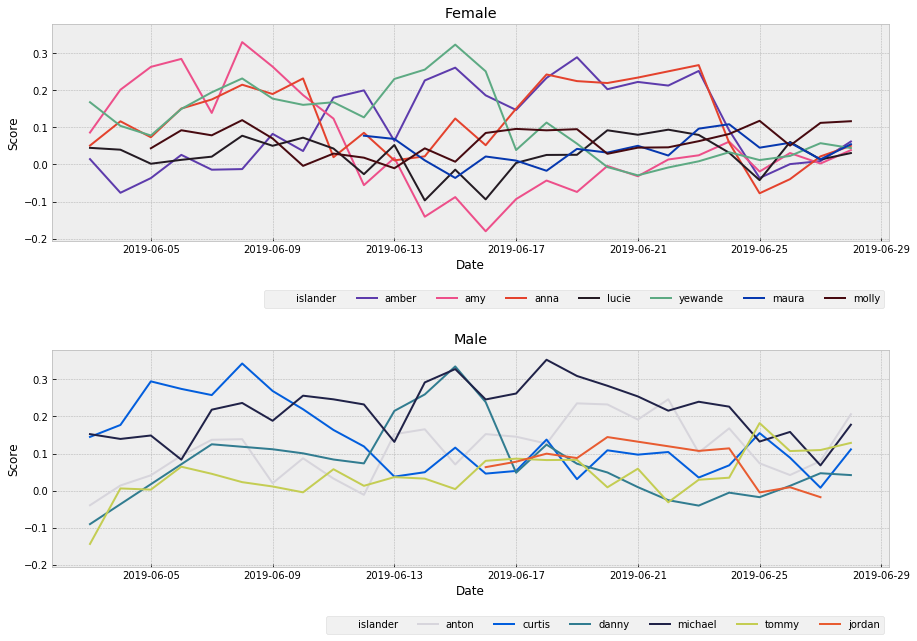

In [92]:
def add_meta(ax, metric, title, x="Date"):
    ax.legend(bbox_to_anchor=(1, -0.2), ncol=11)
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(metric)

args = {"x": "date", "y": "score", "hue": "islander", "palette": PALETTE}
    
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax1 = sns.lineplot(data=df[df["sex"]=="female"], ax=ax1, **args)
add_meta(ax1, "Score", "Female")

ax2 = fig.add_subplot(212, sharex=ax1, sharey=ax1)
sns.lineplot(data=df[df["sex"]=="male"], ax=ax2, **args)
add_meta(ax2, "Score", "Male")

plt.subplots_adjust(hspace=0.5);

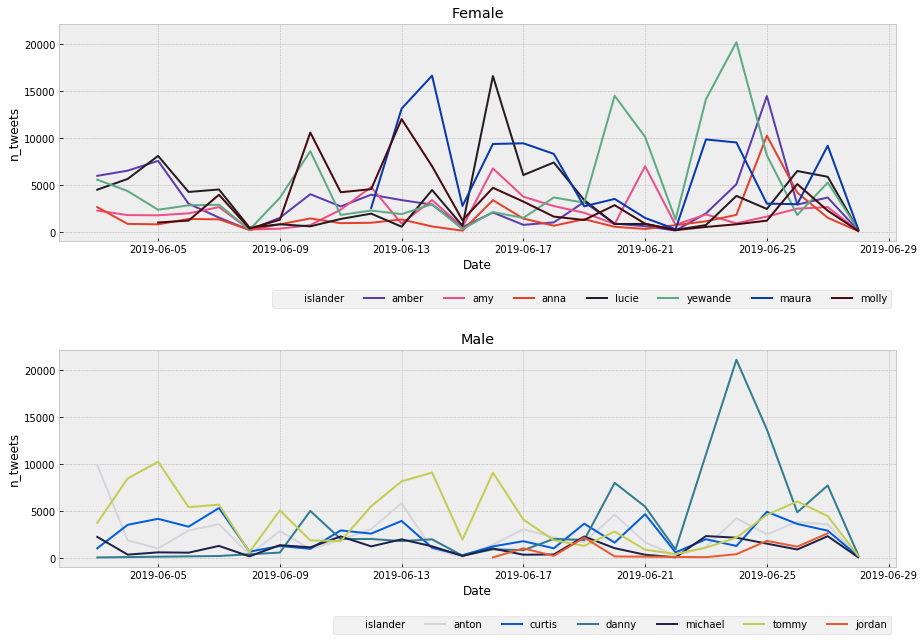

In [25]:
args = {"x": "date", "y": "n_tweets", "hue": "islander", "palette": PALETTE}
    
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
sns.lineplot(data=df[df["sex"]=="female"], ax=ax1, **args)
ax1 = add_meta(ax1, "n_tweets", "Female")

ax2 = fig.add_subplot(212, sharex=ax1, sharey=ax1)
sns.lineplot(data=df[df["sex"]=="male"], ax=ax2, **args)
ax2 = add_meta(ax2, "n_tweets", "Male")

plt.subplots_adjust(hspace=0.5);

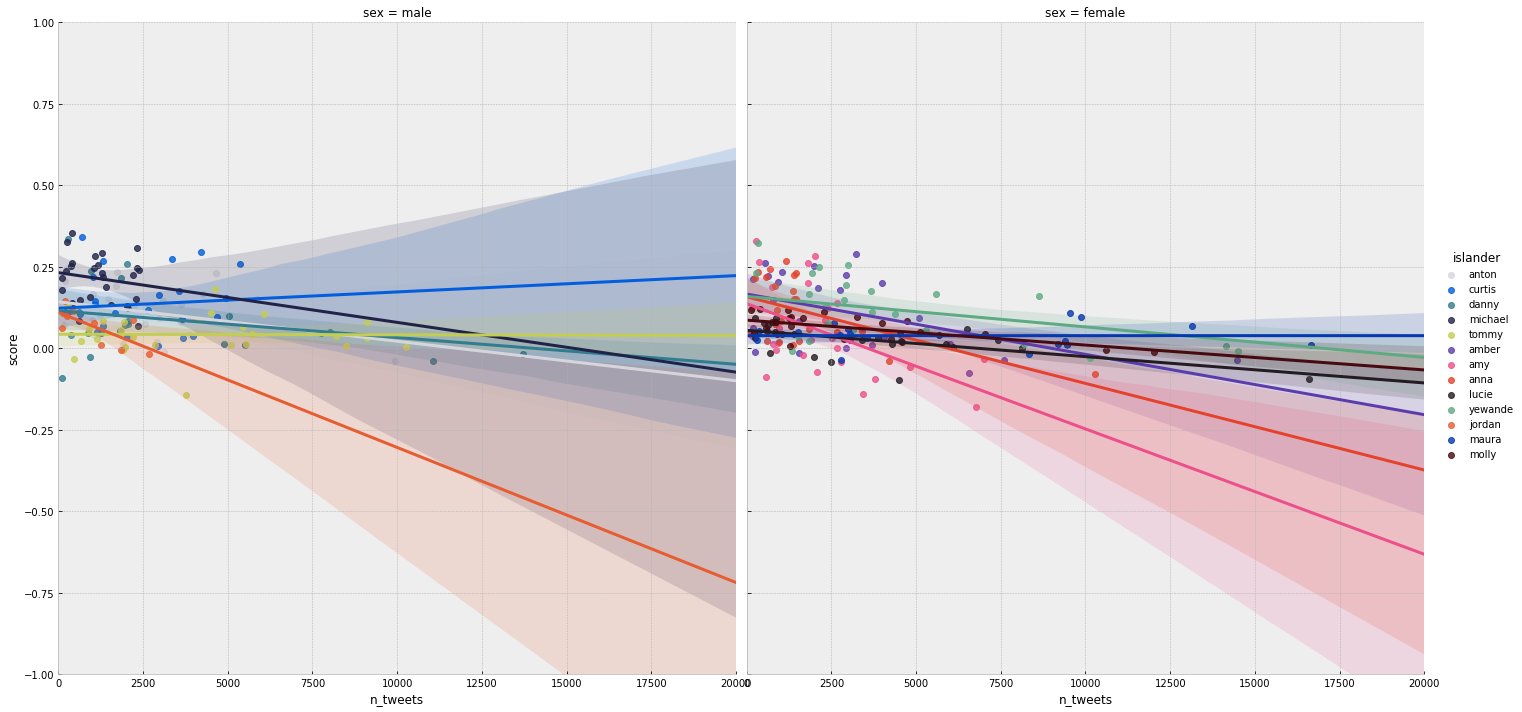

In [7]:
# Who is the most controversial?
# More tweets being correlated with a negative score = more convtroversial??

sns.lmplot("n_tweets", "score", hue="islander", data=df, palette=PALETTE, height=10, col="sex")
plt.ylim(-1,1)
plt.xlim(0,20000);

In [72]:
df = import_all("../data/processed/")

In [73]:
df.head()

,date,favs,retwe,text,url,user,processed,score,islanders,anton,...,arabella,lucie,maura,molly,yewande,elma,weight_senti,hour,dotw,pic
0,2019-06-04,5,0,No way?! # LoveIsland http://qoo.ly/xrtw9,https://twitter.com/heatworld/status/113569763...,heatworld,No way?! http://qoo.ly/xrtw9,-0.3595,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.7975,0,Tuesday,no
1,2019-06-04,3,1,Joe on love island is actually my dream man,https://twitter.com/hib3rnating/status/1135697...,hib3rnating,Joe on is actually my dream man,0.2500,['joe'],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.7500,0,Tuesday,no
2,2019-06-04,10,1,FUCKING HATE ANTON ON LOVE ISLAND HE IS SO ANN...,https://twitter.com/jackichangg/status/1135697...,jackichangg,FUCKING HATE ANTON ON LOVE ISLAND HE IS SO ANN...,-0.4188,['anton'],anton,...,NaN,NaN,NaN,NaN,NaN,NaN,-4.1880,0,Tuesday,no
3,2019-06-04,11,0,tb to whenever love island actually had sexy p...,https://twitter.com/caitlinmcl25/status/113569...,caitlinmcl25,tb to whenever actually had sexy people on it...,0.5267,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.7937,0,Tuesday,yes
4,2019-06-04,2,0,Anton tryna be the new Adam no one can compare...,https://twitter.com/JackFr33/status/1135697556...,JackFr33,Anton tryna be the new Adam no one can compare...,0.2023,['anton'],anton,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4046,0,Tuesday,no


In [10]:
favs = df.groupby(["user", "date"])\
         .agg({"favs":"sum", "url": "count"})\
         .reset_index()\
         .rename(columns={"url": "n_tweets"})

favs["rate"] = favs["favs"] / favs["n_tweets"]
days = favs.groupby("user").size().reset_index(name="n_days")
favs = favs.merge(days, on="user", how="left")

favs = favs[(favs["rate"] > 1000) & (favs["n_days"] > 20)]
len(favs)
# favs.sort_values("rate", ascending=False).head()

205

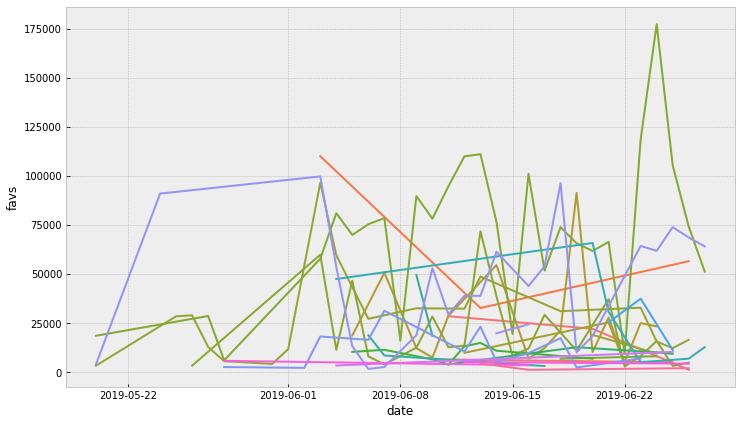

In [11]:
fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(111)
sns.lineplot("date", "favs", "user", data=favs, ax=ax1)
# plt.show()
plt.legend().remove()


In [78]:
def get_counts(df, group):
    return df.groupby(group)["url"].count().reset_index(name="count")

def order_days(df, col="dotw"):
    df[col] = pd.Categorical(
                df[col],
                categories=[
                    "Monday",
                    "Tuesday",
                    "Wednesday",
                    "Thursday",
                    "Friday",
                    "Saturday",
                    "Sunday",
                ],
                ordered=True,
            )
    return df

def get_daily_counts(df, col="date"):
    df = get_counts(df, [col])
    df["dotw"] = df[col].dt.strftime("%A")
    return order_days(df)


def format_xticks(df, ax, n=1, col="date", rotate=True):
    x_dates = to_plot["date"].dt.strftime('%Y-%m-%d').sort_values().unique()
    ax.xaxis.set_major_formatter(plt.FixedFormatter(x_dates))

    if rotate:
        plt.xticks(rotation=20, ha="right")
    
    xticks = ax.xaxis.get_major_ticks()
    for i in range(len(xticks)):
        if i % n != 0:
            xticks[i].set_visible(False);

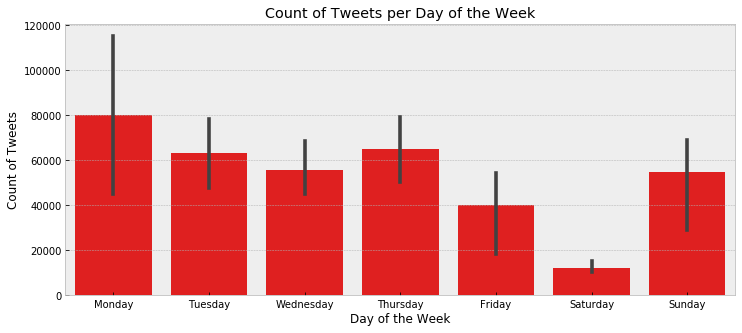

In [80]:
to_plot = get_daily_counts(df) 

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)

sns.barplot("dotw", "count", data=to_plot, color="Red", ax=ax1)

plt.xlabel("Day of the Week")
plt.ylabel("Count of Tweets")
plt.title("Count of Tweets per Day of the Week");

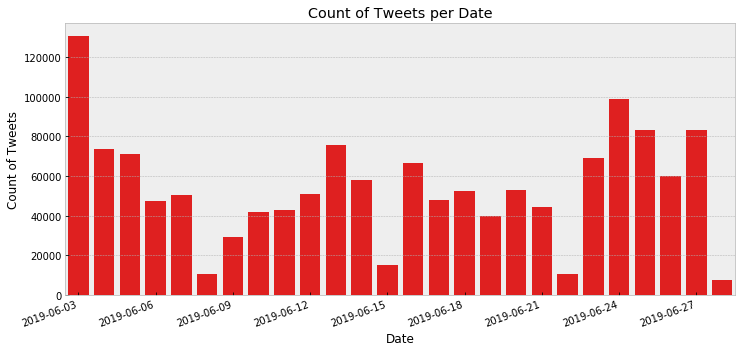

In [82]:
to_plot = get_counts(df, ["date"]) 

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)

sns.barplot("date", "count", data=to_plot, color="Red", ax=ax1)

format_xticks(to_plot, ax1, 3)
plt.xlabel("Date")
plt.ylabel("Count of Tweets")
plt.title("Count of Tweets per Date");

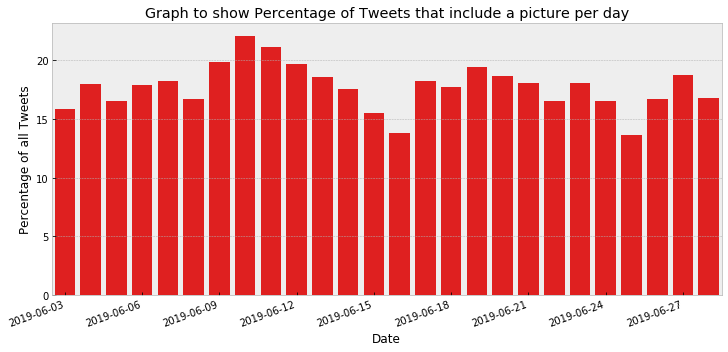

In [83]:
to_plot = get_counts(df, ["date", "pic"]) 
to_plot["perc"] = to_plot.groupby("date")["count"].apply(lambda x: x*100 / x.sum())
to_plot = to_plot[to_plot["pic"] == "yes"]

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)

sns.barplot("date", "perc", data=to_plot, color="Red", ax=ax1)

format_xticks(to_plot, ax1, 3)
plt.title("Graph to show Percentage of Tweets that include a picture per day")
plt.xlabel("Date")
plt.ylabel("Percentage of all Tweets");

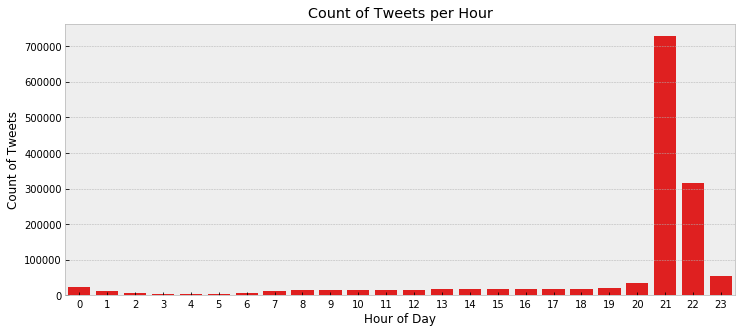

In [87]:
to_plot = get_counts(df, ["hour"]) 

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)

sns.barplot("hour", "count", data=to_plot, color="Red", ax=ax1)

plt.xlabel("Hour of Day")
plt.ylabel("Count of Tweets")
plt.title("Count of Tweets per Hour");